#1. Import Pycaret

In [1]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

In [2]:
from pycaret.utils import version
version()

'3.3.2'

#2. Import Library

In [3]:
import pandas as pd
from pycaret.classification import *

#3. Import Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#path_bugzilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/bugzilla.csv'
#path_columba = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/columba.csv'
#path_jdt = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/jdt.csv'
path_mozilla = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/mozilla.csv'
#path_platform = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/platform.csv'
#path_postgres = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/With in Defect Prediction/Kamei/postgres.csv'

#df = pd.read_csv(path_bugzilla)
#df = pd.read_csv(path_columba)
#df = pd.read_csv(path_jdt)
df = pd.read_csv(path_mozilla)
#df = pd.read_csv(path_platform)
#df = pd.read_csv(path_postgres)

#4. Preprocessing

In [6]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,56,2006/8/28 11:24,1,1,3,0.234710,0.513648,0.172043,403.0,1,31,602,1.0,423,153.983333,21,0
1,61,2006/7/31 14:11,2,2,2,0.435613,0.214493,0.011594,172.5,1,13,59,1.0,1107,1107.000000,598,0
2,62,2006/6/22 17:30,1,1,1,0.000000,0.037184,0.006941,2017.0,1,80,1,1.0,8,8.000000,1,0
3,66,2006/5/25 11:45,1,1,1,0.000000,0.044118,0.000000,204.0,1,5,21,1.0,474,474.000000,30,0
4,97,2005/12/7 20:38,1,1,1,0.000000,0.002500,0.001250,800.0,1,5,2,1.0,7688,2898.733730,19,0


In [7]:
# Menghapus kolom yang tidak dibutuhkan
df_stats = df.drop(columns=['transactionid', 'commitdate'])

# Menghitung statistik deskriptif
df_stats.describe()




,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
count,98275.000000,98275.000000,98275.000000,98275.000000,98275.000000,98275.000000,98275.000000,98275.000000,98275.000000,9.827500e+04,98275.000000,98275.000000,98275.000000,98275.000000,98275.000000
mean,1.198820,1.718525,3.704696,0.306760,0.188110,1.021679,970.585766,0.639919,28.680804,4.633050e+02,0.855208,2176.197100,1051.899582,669.767306,0.052394
std,0.953976,3.962140,21.275412,0.399253,4.791216,34.429655,1233.960974,0.480026,35.107364,9.034187e+03,0.243091,2537.865131,1289.205407,998.335699,0.222821
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.002452,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.001751,0.000378,170.000000,0.000000,4.000000,1.000000e+00,0.700000,420.000000,267.408333,56.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.009124,0.003804,521.000000,1.000000,15.000000,2.600000e+01,1.000000,1284.000000,684.000000,235.000000,0.000000
75%,1.000000,2.000000,3.000000,0.721928,0.038740,0.018386,1269.000000,1.000000,40.000000,2.020000e+02,1.000000,3036.500000,1327.666667,842.000000,0.000000
max,30.000000,307.000000,2817.000000,1.000000,1155.000000,3617.000000,38980.000000,1.000000,408.000000,1.674952e+06,1.000000,20774.000000,10941.190480,10388.000000,1.000000


In [8]:
df['ns'].unique()

array([ 1,  2,  3,  5, 10, 25,  4,  6, 13,  9,  7, 19,  8, 16, 20, 12, 27,
       17, 11, 14, 18, 21, 30, 28, 23, 22, 15, 24, 26])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


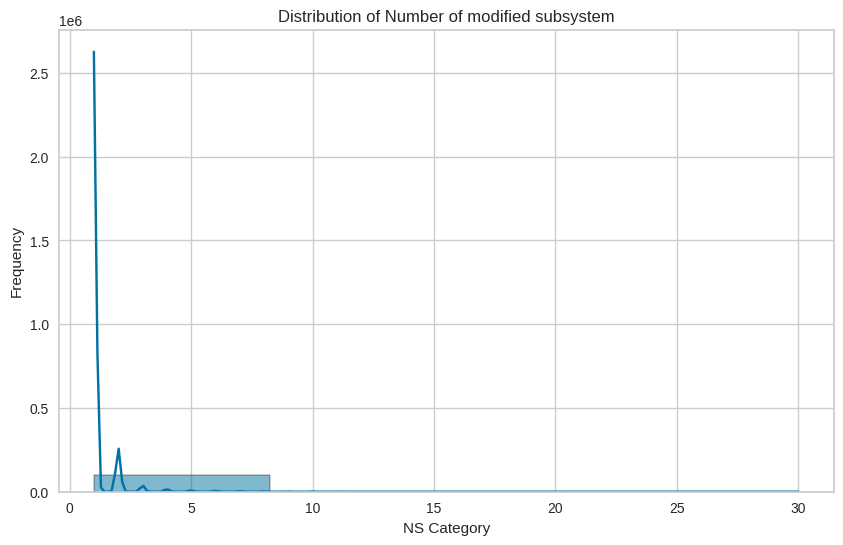

In [10]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ns'], kde=True, color="b", bins=4)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified subsystem')
plt.xlabel('NS Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [11]:
df['nm'].unique()

array([  1,   2,   5,   3,   7,  28,   8,   9,  74,   4,  11,  31,   6,
        26,  20,  57,  23,  15,  10,  34,  18,  12,  16,  21,  29, 167,
        32,  79,  83,  82,  36,  87,  35,  13, 140,  53,  27,  46,  24,
        33,  55,  59, 169,  62,  14,  39,  76,  25, 242,  17, 188,  50,
        61, 135,  70, 118,  40,  94,  22, 189,  56, 101,  42, 102,  54,
        65,  85, 176,  19,  91, 307, 133,  51, 130,  43, 181,  44,  37,
       168,  47, 206, 204, 178,  68,  96,  30,  60,  66,  52,  41,  75,
        89,  77,  58,  80,  67,  38, 111,  71, 114,  45, 294,  84,  81,
       162, 147, 123, 128,  48])

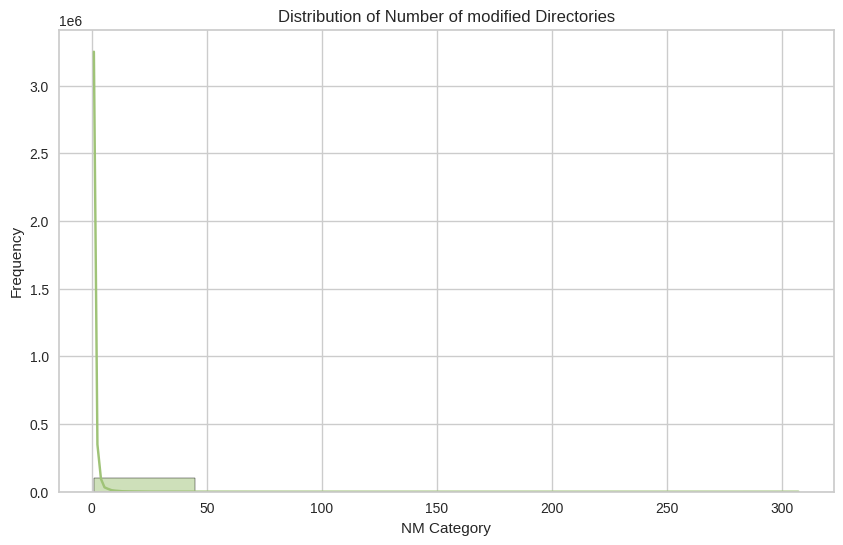

In [12]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nm'], kde=True, color="g", bins=7)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Directories')
plt.xlabel('NM Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [13]:
df['nf'].unique()

array([   3,    2,    1,  105,   11,    8,   10,   87,    9,  150,    4,
          6,    5,   55,    7,   44,  149,   12,   83,   77,   15,   19,
         29,  193,  264,   40,  211,   26,  111,   17,   20,   57,   61,
         16,   14,   18,   35,   13,   31,   22,   56,   21,   33,   36,
       2039,   24,   66,   34,   27,   64,  126,   46,   38,  178,   62,
         39,   60,  186,   47,   79,   73,  151,   25,   23,   67,   32,
        120,   42,  242,   89,   51,   41,  188,   30,   85,  202,  457,
         58,   91,  732,   54,  116,  948,   48,   76,   99,   72,   95,
        119,  102,  148,  474,   86,  118,  337,  122,  374,  132,  170,
        450,   52, 1267,  244,  123,   50,  814,  315,   69,   59, 1682,
         74,  333,  140,   37,  707,  286,   90,  237,   43,  485,   84,
         97,   93,  113,  101,  420,   65,  763,  756,   28,  642,   68,
        360,   81,   92,  161,  266,   53,  108,  187,  227,  208,   45,
         70,  468,  115,  310,  158,  138,  183,   

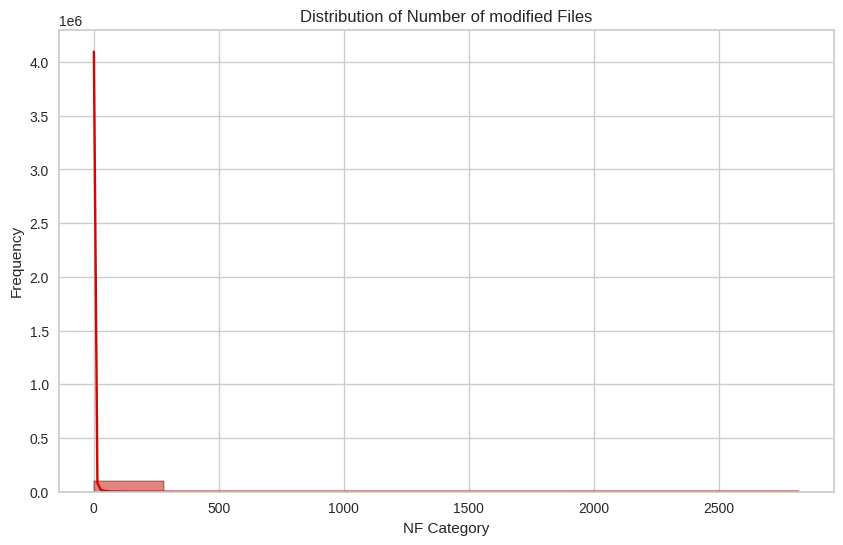

In [14]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['nf'], kde=True, color="r", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of modified Files')
plt.xlabel('NF Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [15]:
df['entropy'].unique()

array([0.23471011, 0.43561337, 0.        , ..., 0.90010615, 0.97813691,
       0.96369232])

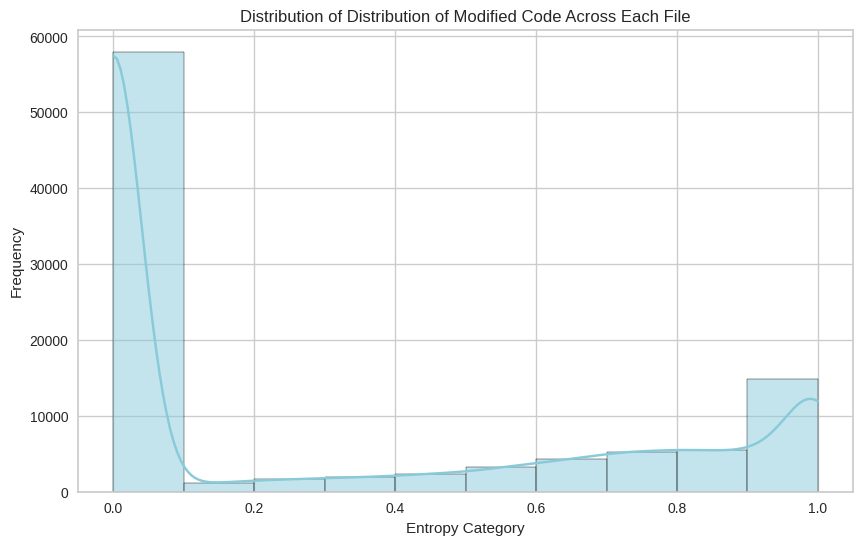

In [16]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['entropy'], kde=True, color="c", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Distribution of Modified Code Across Each File')
plt.xlabel('Entropy Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [17]:
df['la'].unique()

array([0.51364764, 0.21449275, 0.03718394, ..., 2.37974684, 0.04154303,
       2.17647059])

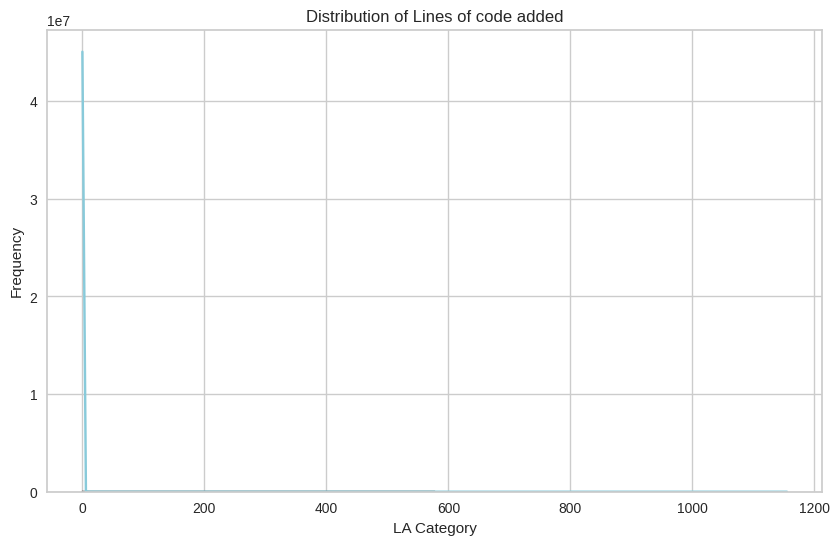

In [18]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['la'], kde=True, color="c", bins=2)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code added')
plt.xlabel('LA Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [19]:
df['ld'].unique()

array([0.17204301, 0.0115942 , 0.006941  , ..., 0.82732634, 0.34080718,
       0.07006369])

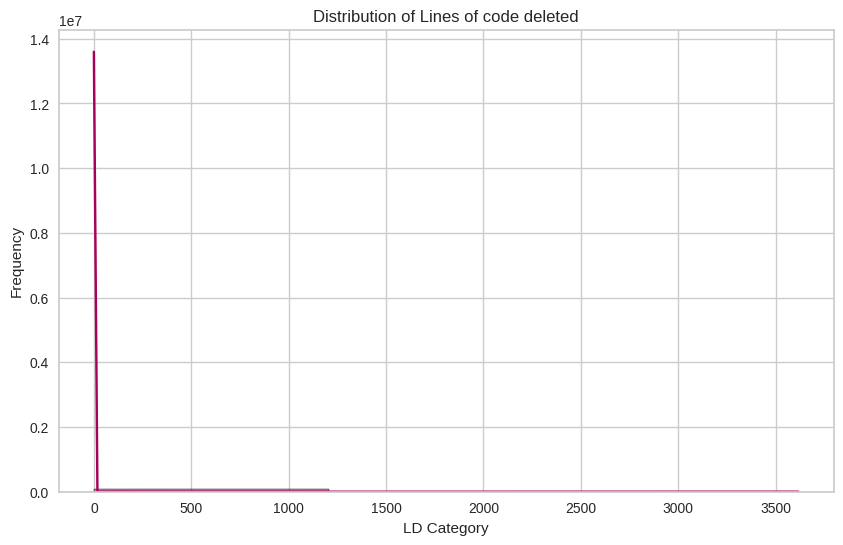

In [20]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ld'], kde=True, color="m", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code deleted')
plt.xlabel('LD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [21]:
df['lt'].unique()

array([ 403.        ,  172.5       , 2017.        , ...,   63.31578947,
         78.25641026,   74.16666667])

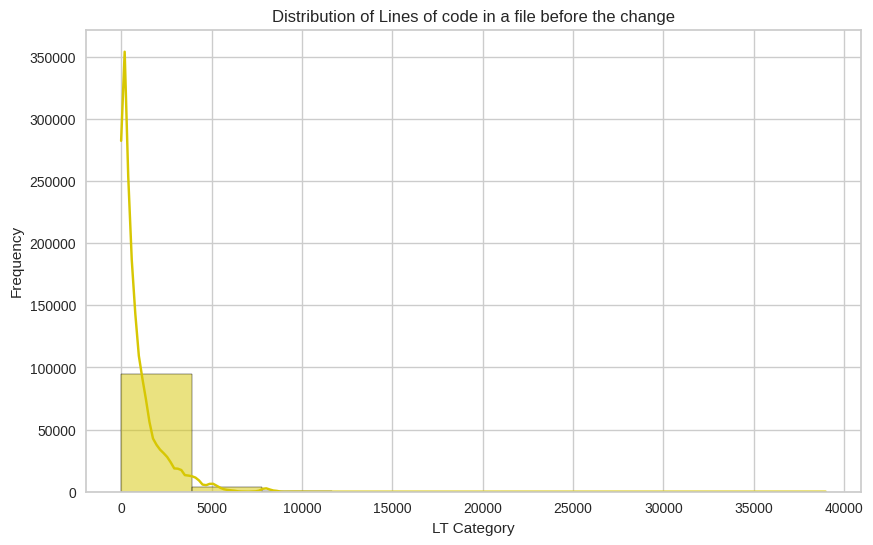

In [22]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['lt'], kde=True, color="y", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Lines of code in a file before the change')
plt.xlabel('LT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [23]:
df['fix'].unique()

array([1, 0])

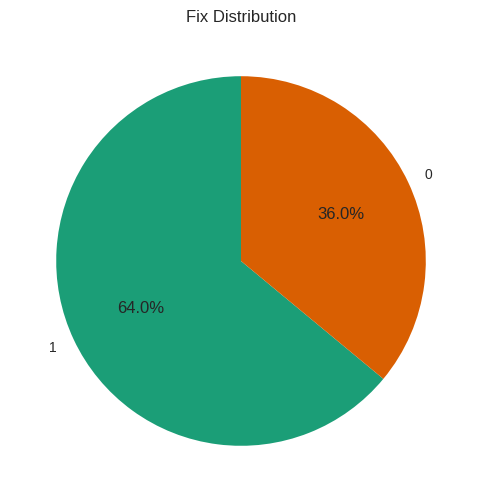

In [24]:
a=df['fix'].value_counts()

# Membuat pie diagram
plt.figure(figsize=(8, 6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=90)

# Menambahkan judul
plt.title('Fix Distribution')

# Menampilkan plot
plt.show()

In [25]:
df['ndev'].unique()

array([ 31,  13,  80,   5,  43,  14,   2, 148,   1,  27, 119,  60,  75,
       109, 201,  61, 291,   7,  76,  20,  82,   6, 131,   3,  24,  72,
        38, 142, 127, 147,  22, 141,  32,   4, 132, 140,   8,  15,  26,
       133,  62, 166,  99, 234,  59, 164,  55,  18,  30,  57,  19,  56,
        39,  74,  77,  16, 124, 169, 104,  11, 103, 120, 154,  90,  63,
       102, 111, 136,  98,  52, 145,  89,  53, 121, 128,  87, 122, 130,
        40, 123, 106, 115,  86, 126, 107,  47, 108,  46,  70, 149,  29,
        41, 116, 129, 134,  42,  50,  36,  48, 114, 232,  25, 117,  45,
        23,  84, 139,  65, 263,  33,  88,  95, 118,  94, 158,   9,  10,
        83, 125, 112,  34,  69, 262,  92, 113, 110,  78, 173,  49, 105,
        64,  37,  21, 183,  85,  12,  54, 331,  17,  66,  35,  44, 101,
       248, 204,  28,  67, 137, 100, 135, 144,  73,  91, 178, 189, 206,
        68, 156,  51,  79, 212, 163, 192, 215, 247, 222, 270, 224, 281,
       363, 274, 260, 266, 258, 313, 241, 284, 185,  97, 200, 19

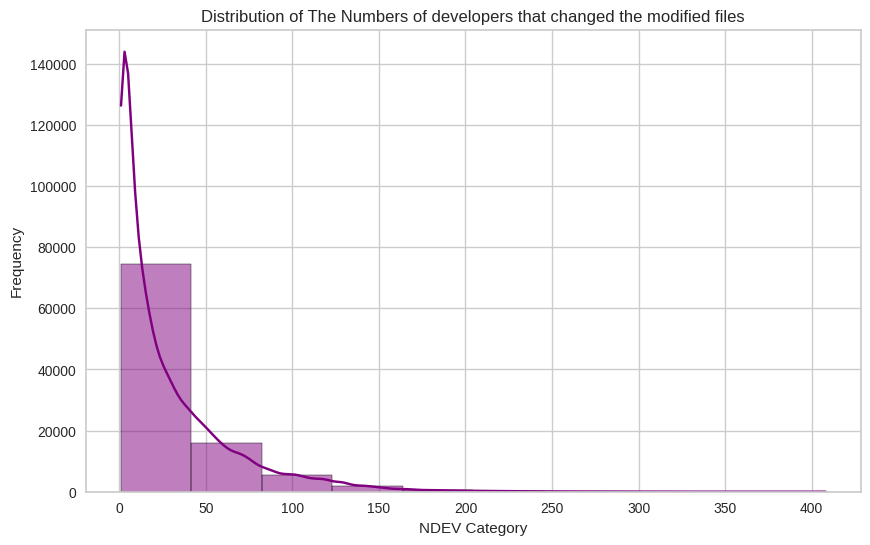

In [26]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['ndev'], kde=True, color="purple", bins=10)

# Menambahkan judul dan label sumbu
plt.title('Distribution of The Numbers of developers that changed the modified files')
plt.xlabel('NDEV Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [28]:
df['pd'].unique()

array([ 602,   59,    1, ..., 6580, 3280, 2725])

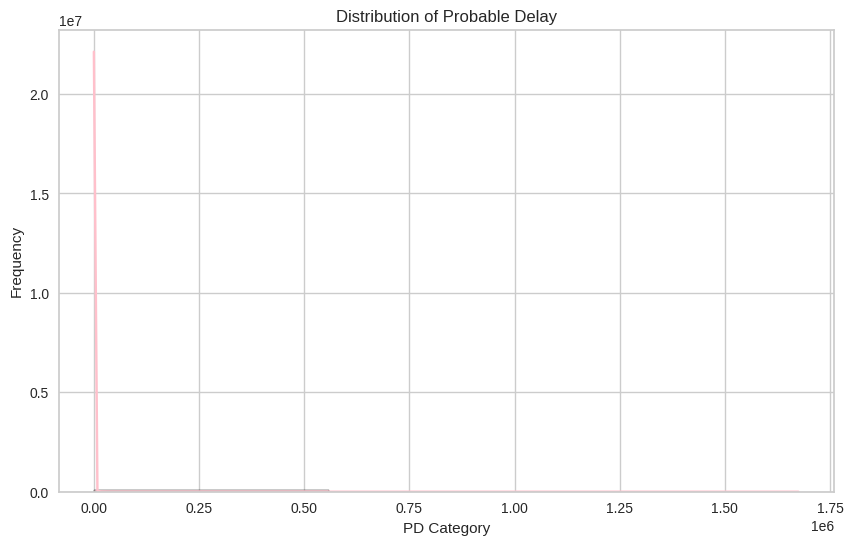

In [29]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="pink", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Probable Delay')
plt.xlabel('PD Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [30]:
df['npt'].unique()

array([1.        , 0.66666667, 0.8       , 0.43678161, 0.22222222,
       0.7       , 0.63636364, 0.6       , 0.36363636, 0.5       ,
       0.2       , 0.81818182, 0.44444444, 0.72727273, 0.9       ,
       0.73154362, 0.83333333, 0.14457831, 0.75      , 0.85714286,
       0.14285714, 0.46666667, 0.15789474, 0.86206897, 0.72020725,
       0.50757576, 0.68421053, 0.54545455, 0.25      , 0.35      ,
       0.33333333, 0.57894737, 0.34123223, 0.4       , 0.46153846,
       0.52252252, 0.70588235, 0.1       , 0.3       , 0.57142857,
       0.80769231, 0.7704918 , 0.55555556, 0.64705882, 0.77777778,
       0.71428571, 0.6875    , 0.90909091, 0.88888889, 0.875     ,
       0.78571429, 0.72222222, 0.61538461, 0.65714286, 0.73333333,
       0.69230769, 0.5483871 , 0.96153846, 0.69642857, 0.57575758,
       0.00245218, 0.73684211, 0.5625    , 0.70833333, 0.03030303,
       0.61764706, 0.42105263, 0.25925926, 0.61261261, 0.44117647,
       0.75757576, 0.13114754, 0.04761905, 0.390625  , 0.65873

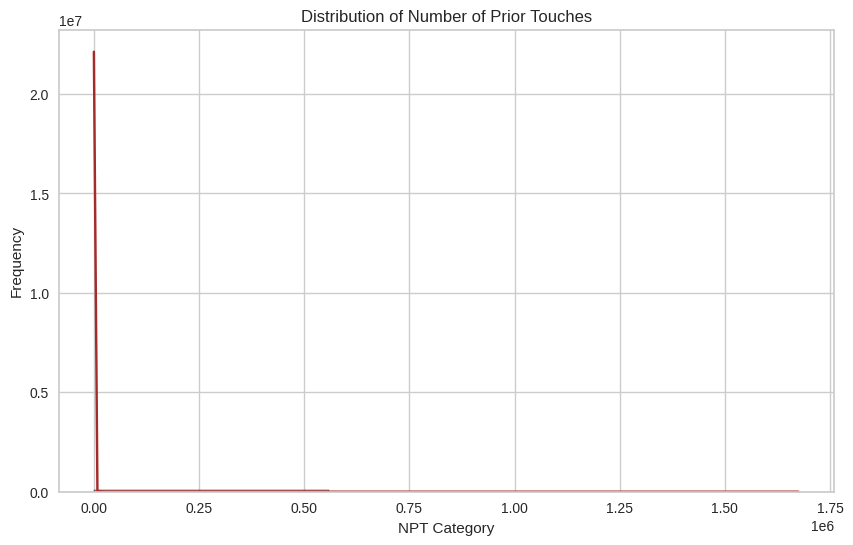

In [31]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['pd'], kde=True, color="brown", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Number of Prior Touches')
plt.xlabel('NPT Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

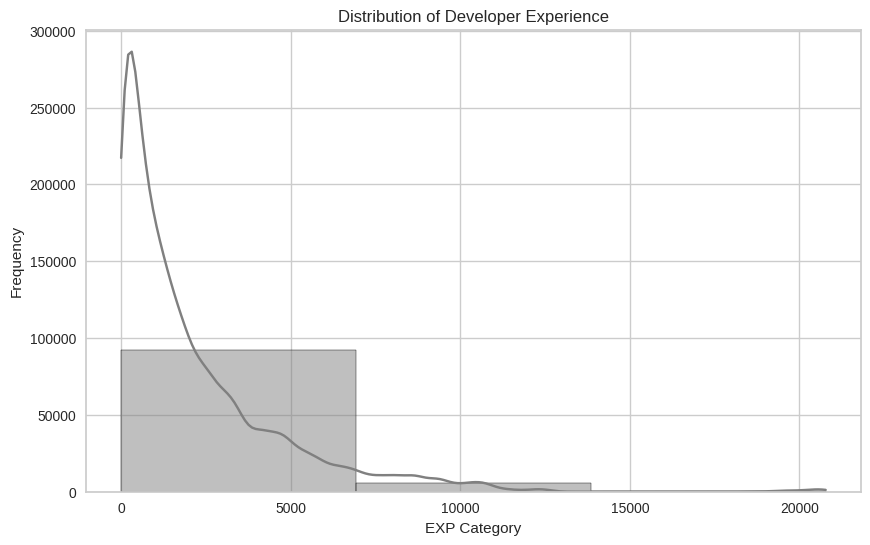

In [32]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['exp'], kde=True, color="gray", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience')
plt.xlabel('EXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

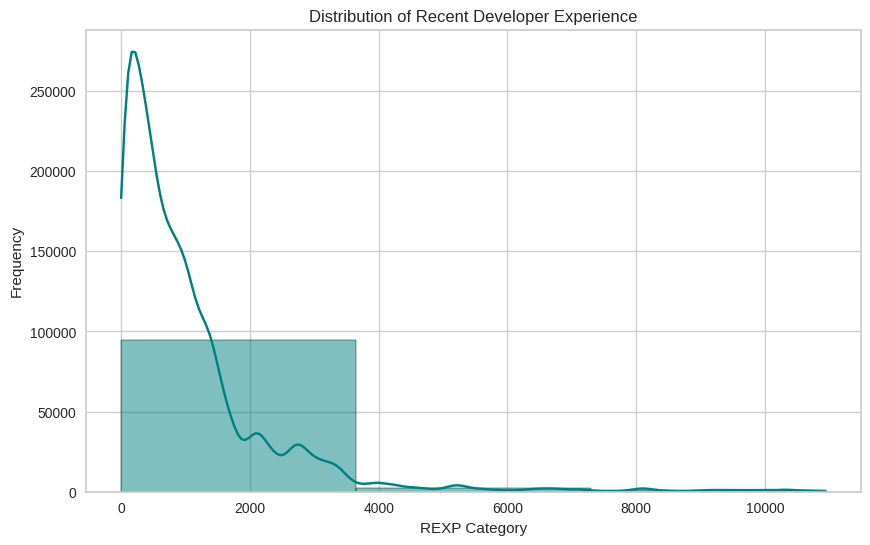

In [33]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['rexp'], kde=True, color="teal", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Recent Developer Experience')
plt.xlabel('REXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

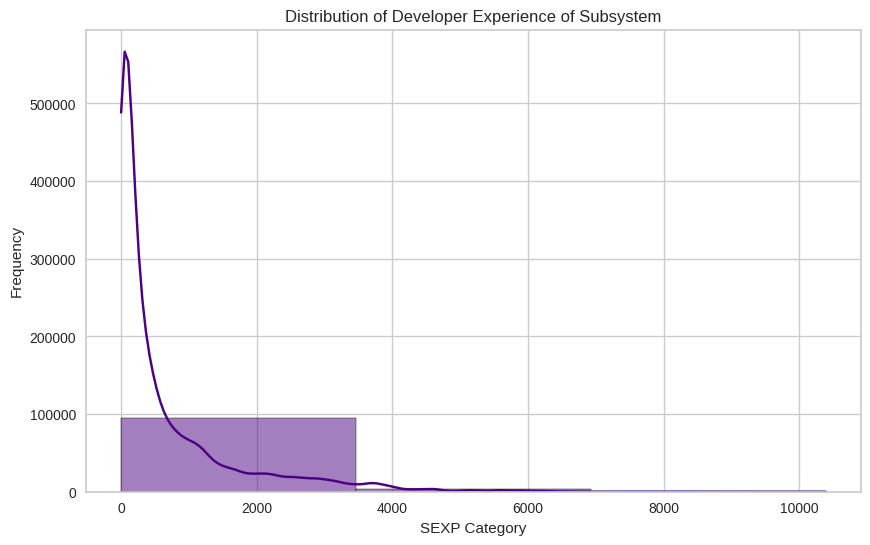

In [34]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['sexp'], kde=True, color="indigo", bins=3)

# Menambahkan judul dan label sumbu
plt.title('Distribution of Developer Experience of Subsystem')
plt.xlabel('SEXP Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

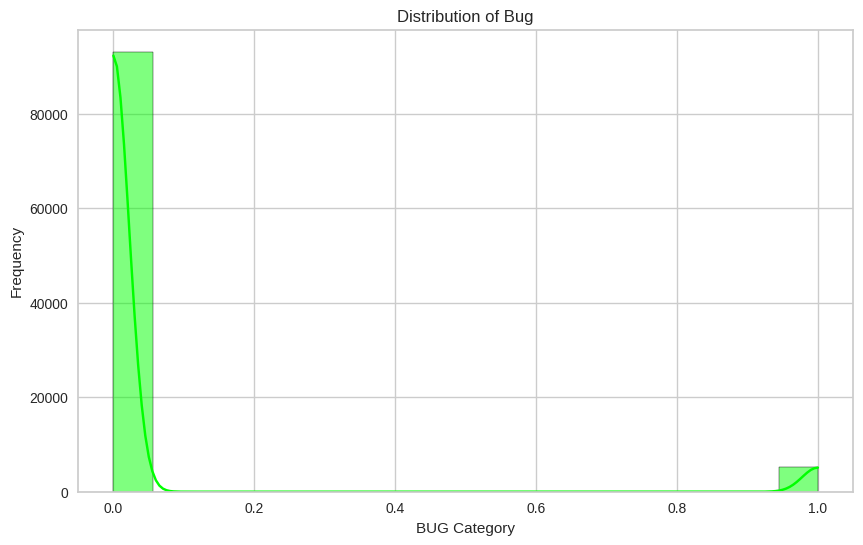

In [35]:
# Membuat plot distribusi dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['bug'], kde=True, color="lime")

# Menambahkan judul dan label sumbu
plt.title('Distribution of Bug')
plt.xlabel('BUG Category')
plt.ylabel('Frequency')

# Menampilkan plot
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98275 entries, 0 to 98274
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  98275 non-null  int64  
 1   commitdate     98275 non-null  object 
 2   ns             98275 non-null  int64  
 3   nm             98275 non-null  int64  
 4   nf             98275 non-null  int64  
 5   entropy        98275 non-null  float64
 6   la             98275 non-null  float64
 7   ld             98275 non-null  float64
 8   lt             98275 non-null  float64
 9   fix            98275 non-null  int64  
 10  ndev           98275 non-null  int64  
 11  pd             98275 non-null  int64  
 12  npt            98275 non-null  float64
 13  exp            98275 non-null  int64  
 14  rexp           98275 non-null  float64
 15  sexp           98275 non-null  int64  
 16  bug            98275 non-null  int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 

In [37]:
df.isna().sum()

,0
transactionid,0
commitdate,0
ns,0
nm,0
nf,0
entropy,0
la,0
ld,0
lt,0
fix,0


In [38]:
df.drop(['transactionid', 'commitdate'], axis=1, inplace=True)
df.head()

,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,1,3,0.234710,0.513648,0.172043,403.0,1,31,602,1.0,423,153.983333,21,0
1,2,2,2,0.435613,0.214493,0.011594,172.5,1,13,59,1.0,1107,1107.000000,598,0
2,1,1,1,0.000000,0.037184,0.006941,2017.0,1,80,1,1.0,8,8.000000,1,0
3,1,1,1,0.000000,0.044118,0.000000,204.0,1,5,21,1.0,474,474.000000,30,0
4,1,1,1,0.000000,0.002500,0.001250,800.0,1,5,2,1.0,7688,2898.733730,19,0


In [39]:
df['bug'].value_counts()

,count
bug,
0,93126
1,5149


#4. Training

In [40]:
clf = setup(
    data=df,
    target='bug',
    session_id=101,
    fix_imbalance=True,
    fix_imbalance_method='smote',
    fold=10,
    verbose=True
)

,Description,Value
0,Session id,101
1,Target,bug
2,Target type,Binary
3,Original data shape,"(98275, 15)"
4,Transformed data shape,"(159859, 15)"
5,Transformed train set shape,"(130376, 15)"
6,Transformed test set shape,"(29483, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [41]:
# 6. Bandingkan semua model dan ambil model terbaik
best_model = compare_models(sort='Accuracy', exclude=['dummy'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9409,0.8288,0.2425,0.3975,0.3007,0.2718,0.2811,37.2490
lightgbm,Light Gradient Boosting Machine,0.9407,0.8335,0.2719,0.4034,0.3245,0.2947,0.3012,5.5690
xgboost,Extreme Gradient Boosting,0.9401,0.8275,0.2458,0.3871,0.3004,0.2708,0.2786,1.9010
et,Extra Trees Classifier,0.9340,0.8247,0.3074,0.3512,0.3276,0.2931,0.2939,16.4370
gbc,Gradient Boosting Classifier,0.9061,0.8235,0.4376,0.2626,0.3281,0.2810,0.2917,51.8050
dt,Decision Tree Classifier,0.8990,0.6047,0.2758,0.1864,0.2224,0.1705,0.1743,2.3330
ada,Ada Boost Classifier,0.8761,0.7952,0.4809,0.2066,0.2889,0.2327,0.2579,10.9220
knn,K Neighbors Classifier,0.7844,0.6182,0.3710,0.0962,0.1527,0.0758,0.0989,2.2970
lr,Logistic Regression,0.7762,0.7595,0.6046,0.1350,0.2207,0.1476,0.2052,11.3210
ridge,Ridge Classifier,0.7377,0.7293,0.5971,0.1148,0.1926,0.1148,0.1715,0.4130


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [42]:
xgboost= create_model('xgboost')
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9422,0.8232,0.2382,0.4115,0.3018,0.2738,0.2850
1,0.9384,0.8201,0.2687,0.3774,0.3139,0.2826,0.2871
2,0.9432,0.8454,0.3000,0.4372,0.3558,0.3272,0.3336
3,0.9362,0.8093,0.2167,0.3319,0.2622,0.2304,0.2361
4,0.9397,0.8361,0.2389,0.3789,0.2930,0.2632,0.2709
5,0.9388,0.8323,0.2278,0.3644,0.2803,0.2502,0.2577
6,0.9411,0.8383,0.2611,0.4034,0.3170,0.2877,0.2952
7,0.9407,0.8241,0.2333,0.3889,0.2917,0.2627,0.2721
8,0.9420,0.8404,0.2521,0.4136,0.3133,0.2848,0.2944


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9490,0.8164,0.0637,0.6389,0.1159,0.1074,0.1907
1,0.9496,0.8133,0.0886,0.6400,0.1557,0.1448,0.2254
2,0.9500,0.8334,0.0944,0.6538,0.1650,0.1539,0.2357
3,0.9482,0.8022,0.0583,0.5526,0.1055,0.0965,0.1674
4,0.9482,0.8202,0.0500,0.5625,0.0918,0.0840,0.1566
5,0.9504,0.8174,0.0889,0.7111,0.1580,0.1481,0.2400
6,0.9498,0.8311,0.0611,0.7586,0.1131,0.1061,0.2064
7,0.9480,0.8038,0.0583,0.5250,0.1050,0.0955,0.1623
8,0.9490,0.8211,0.0693,0.6250,0.1247,0.1154,0.1964


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:
# 7. Finalisasi model terbaik
final_model = finalize_model(tuned_xgboost)

In [44]:
# 8. Evaluasi model dengan berbagai plot
evaluate_model(final_model)  # akan menampilkan GUI dengan berbagai evaluasi (ROC, Confusion Matrix, dll)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
# 9. Simpan model ke Google Drive
model_path = '/content/drive/MyDrive/S2/Semester III/Software Quality & Effort Estimation/Tugas/Tugas III/Cross Project Defect Prediction/Model/mozilla_best_model'
save_model(final_model, model_path)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ns', 'nm', 'nf', 'entropy', 'la',
                                              'ld', 'lt', 'fix', 'ndev', 'pd',
                                              'npt', 'exp', 'rexp', 'sexp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer'...
                                importance_type=None,
                                interactio